# Assignment 9

* Calculate Pi value using openMPI send and receive messages for atleast 35-40 terms.
* Change the value on n as 2, 4, 8, 16.
* Analyze the performance improvement using number of processes.

In [1]:
from mpi4py import MPI
import random
import matplotlib.pyplot as plt
import time

In [2]:
def calculate_pi(rank, num_processes, terms):
    partial_sum = 0.0
    for i in range(rank, terms, num_processes):
        if i % 2 == 0:
            partial_sum += 1.0 / (2 * i + 1)
        else:
            partial_sum -= 1.0 / (2 * i + 1)
    return partial_sum * 4

if __name__ == "__main__":
    comm = MPI.COMM_WORLD
    rank = comm.Get_rank()
    size = comm.Get_size()

    terms = 100000000

    start_time = time.time()

    partial_pi = calculate_pi(rank, size, terms)
    print(f"Process {rank} calculated: Pi = {partial_pi}, Time = {time.time() - start_time} seconds")

    if rank == 0:
        total_pi = partial_pi
        for i in range(1, size):
            partial_result, partial_time = comm.recv(source=i)
            total_pi += partial_result
            print(f"Process {i} received: Pi = {partial_result}, Time = {partial_time} seconds")

        print("Number of processes:", size)
        print("Estimated Pi:", total_pi)
        print("Execution time:", time.time() - start_time, "seconds")
    else:
        comm.send((partial_pi, time.time() - start_time), dest=0)

Process 0 calculated: Pi = 3.141592643589326, Time = 16.853801012039185 seconds
Number of processes: 1
Estimated Pi: 3.141592643589326
Execution time: 16.853801012039185 seconds


In [3]:
!mpiexec -n 2 python Calculate_Pi_value.py

Process 1 calculated: Pi = -18.813394448175345, Time = 7.08020806312561 seconds
Process 0 calculated: Pi = 21.954987091759833, Time = 7.084234952926636 seconds
Process 1 received: Pi = -18.813394448175345, Time = 7.08020806312561 seconds
Number of processes: 2
Estimated Pi: 3.141592643584488
Execution time: 7.084234952926636 seconds


In [10]:
!mpiexec -n 4 python Calculate_Pi_value.py

Process 1 calculated: Pi = -9.894192713487952, Time = 5.464809417724609 seconds
Process 2 calculated: Pi = 9.243547576205538, Time = 5.615514755249023 seconds
Process 3 calculated: Pi = -8.919201734688878, Time = 5.6487884521484375 seconds
Process 0 calculated: Pi = 12.711439515567903, Time = 5.480837345123291 seconds
Process 1 received: Pi = -9.894192713487952, Time = 5.4658119678497314 seconds
Process 2 received: Pi = 9.243547576205538, Time = 5.615514755249023 seconds
Process 3 received: Pi = -8.919201734688878, Time = 5.6487884521484375 seconds
Number of processes: 4
Estimated Pi: 3.1415926435966117
Execution time: 5.6487884521484375 seconds


In [8]:
!mpiexec -n 8 python Calculate_Pi_value.py

Process 5 calculated: Pi = -4.399299923327154, Time = 4.300693988800049 seconds
Process 4 calculated: Pi = 4.5064163512322155, Time = 4.332261800765991 seconds
Process 3 calculated: Pi = -4.662641756747161, Time = 4.349788427352905 seconds
Process 2 calculated: Pi = 4.924086190869872, Time = 4.361311197280884 seconds
Process 6 calculated: Pi = 4.319461385334904, Time = 4.376924514770508 seconds
Process 1 calculated: Pi = -5.494892790161891, Time = 4.4154744148254395 seconds
Process 7 calculated: Pi = -4.256559977941305, Time = 4.42398738861084 seconds
Process 0 calculated: Pi = 8.205023164331104, Time = 4.431013584136963 seconds
Process 1 received: Pi = -5.494892790161891, Time = 4.4154744148254395 seconds
Process 2 received: Pi = 4.924086190869872, Time = 4.361311197280884 seconds
Process 3 received: Pi = -4.662641756747161, Time = 4.349788427352905 seconds
Process 4 received: Pi = 4.5064163512322155, Time = 4.332261800765991 seconds
Process 5 received: Pi = -4.399299923327154, Time =

In [9]:
!mpiexec -n 16 python Calculate_Pi_value.py

Process 15 calculated: Pi = -2.0347399856201327, Time = 2.499709367752075 seconds
Process 14 calculated: Pi = 2.048883162920837, Time = 2.5267527103424072 seconds
Process 6 calculated: Pi = 2.2705782224129933, Time = 2.5746617317199707 seconds
Process 11 calculated: Pi = -2.102010079259159, Time = 2.591703176498413 seconds
Process 7 calculated: Pi = -2.221819992321798, Time = 2.648799180984497 seconds
Process 2 calculated: Pi = 2.799255131066239, Time = 2.6804044246673584 seconds
Process 3 calculated: Pi = -2.5606316774894724, Time = 2.7119908332824707 seconds
Process 13 calculated: Pi = -2.064566837527382, Time = 2.957490921020508 seconds
Process 5 calculated: Pi = -2.334733085800057, Time = 3.46201753616333 seconds
Process 10 calculated: Pi = 2.1248310598041242, Time = 3.718217134475708 seconds
Process 1 calculated: Pi = -3.343438528087643, Time = 3.7381417751312256 seconds
Process 9 calculated: Pi = -2.1514542620738304, Time = 3.7782135009765625 seconds
Process 8 calculated: Pi = 2.

In [11]:
num_processes = [1,2, 4, 8, 16]
execution_times = [ 16.853801012039185, 7.084234952926636, 4.198212623596191, 5.6487884521484375, 3.7876338958740234]

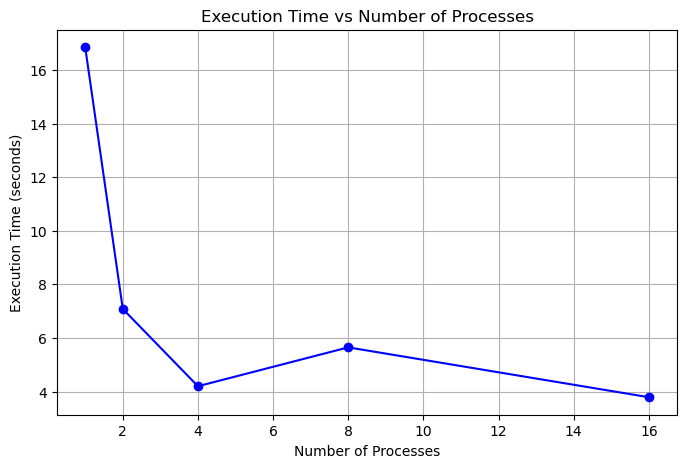

In [12]:
plt.figure(figsize=(8, 5))
plt.plot(num_processes, execution_times, marker='o', color='blue')
plt.title('Execution Time vs Number of Processes')
plt.xlabel('Number of Processes')
plt.ylabel('Execution Time (seconds)')
plt.grid(True)
plt.show()